In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
metadata = pd.read_csv('metadata.csv')

In [3]:
metadata.head()

itemid             title      genres country  running_min
0   55396  ÏãúÎùºÎÖ∏;Ïó∞Ïï†Ï°∞ÏûëÎã® (2010)  Î°úÎß®Ïä§/Î©úÎ°ú/ÏΩîÎØ∏Îîî      ÌïúÍµ≠          121
1   42858    Î≥∏ ÏñºÌã∞Î©îÏù¥ÌÖÄ (2007)          Ïï°ÏÖò      ÎØ∏Íµ≠           -1
2  121058      Ïñ¥Îäê Í∞ÄÏ°± (2018)         ÎìúÎùºÎßà      ÏùºÎ≥∏          121
3    4285  ÌéÄÏπò ÎìúÎ†ÅÌÅ¨ Îü¨Î∏å (2002)         ÏΩîÎØ∏Îîî      ÎØ∏Íµ≠           95
4   36948       ÏûêÌÜ†Ïù¥Ïπò (2003)      Ïï°ÏÖò/ÏãúÎåÄÍ∑π      ÏùºÎ≥∏          115

In [4]:
ratings = pd.read_csv('ratings-train.csv')
ratings.head()
# itemid Í∞Ä NÏù∏ ÏòÅÌôîÏóê 0-10Ï†ê Ï§ëÏóêÏÑú NÏ†êÏùÑ Ï£ºÏóàÎã§.

userid  itemid  rating
0  MVdyRkY=   55396       9
1  TzZqVQ==   55396       7
2  REI4WTI=   55396       9
3  bDJ4aA==   55396       7
4  QktyMw==   55396       7

(array([ 1628.,  1273.,   846.,  1316.,  2027.,  4124.,  6840.,  8467.,
         7162., 10403.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

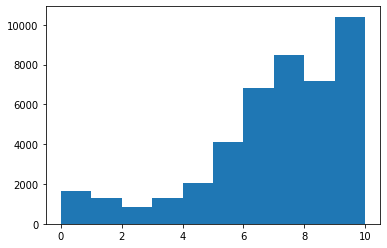

In [5]:
# ratings dataÏùò rating Î∂ÑÌè¨
plt.hist(ratings['rating'])

# ÏóÑÏ≤≠ ÏßúÍ≤å Ï£ºÏßÑ ÏïäÎäîÎã§. Î≥¥ÌÜµ 8-9Ï†êÏù¥ ÎßéÏùÄÎç∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Î™®Îì† ÌèâÏ†êÏùÑ Í∞ÄÏ†∏Ïò§ÏßÑ ÏïäÏïÑÏÑú Ï°∞Í∏à Ìé∏Ìñ•Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÇòÌÉÄÎÇ¨Îã§Í≥† Î≥º Ïàò ÏûàÎã§

In [6]:
ratings_with_movies = pd.merge(ratings, metadata, how='left', on = 'itemid')
ratings_with_movies.head()

userid  itemid  rating             title      genres country  running_min
0  MVdyRkY=   55396       9  ÏãúÎùºÎÖ∏;Ïó∞Ïï†Ï°∞ÏûëÎã® (2010)  Î°úÎß®Ïä§/Î©úÎ°ú/ÏΩîÎØ∏Îîî      ÌïúÍµ≠          121
1  TzZqVQ==   55396       7  ÏãúÎùºÎÖ∏;Ïó∞Ïï†Ï°∞ÏûëÎã® (2010)  Î°úÎß®Ïä§/Î©úÎ°ú/ÏΩîÎØ∏Îîî      ÌïúÍµ≠          121
2  REI4WTI=   55396       9  ÏãúÎùºÎÖ∏;Ïó∞Ïï†Ï°∞ÏûëÎã® (2010)  Î°úÎß®Ïä§/Î©úÎ°ú/ÏΩîÎØ∏Îîî      ÌïúÍµ≠          121
3  bDJ4aA==   55396       7  ÏãúÎùºÎÖ∏;Ïó∞Ïï†Ï°∞ÏûëÎã® (2010)  Î°úÎß®Ïä§/Î©úÎ°ú/ÏΩîÎØ∏Îîî      ÌïúÍµ≠          121
4  QktyMw==   55396       7  ÏãúÎùºÎÖ∏;Ïó∞Ïï†Ï°∞ÏûëÎã® (2010)  Î°úÎß®Ïä§/Î©úÎ°ú/ÏΩîÎØ∏Îîî      ÌïúÍµ≠          121

In [7]:
ratings_with_movies['title'].nunique()

5832

In [8]:
#ratings_with_movies.groupby('userid')['title'].value_counts().plot(kind='bar')

In [9]:
users = ratings_with_movies['userid'].unique()

In [10]:
tmp = ratings_with_movies[ratings_with_movies['userid'] == users[0]]['genres'].value_counts()

In [11]:
tmp.nlargest(3)

ÎìúÎùºÎßà    4
Ïä§Î¶¥Îü¨    2
ÏΩîÎØ∏Îîî    1
Name: genres, dtype: int64

In [12]:
# meta data Ïùò Ïû•Î•¥ Î∂ÑÌè¨
all_genres = ratings_with_movies['genres']

In [13]:
all_genres[0].strip().split('/')

['Î°úÎß®Ïä§', 'Î©úÎ°ú', 'ÏΩîÎØ∏Îîî']

In [14]:
# genres = {}
# if 'Î°úÎß®Ïä§' not in genres.keys():
#     genres['Î°úÎß®Ïä§'] = 1
# genres

In [15]:
genres = {}
for a in all_genres:
#     tmp_arr = a.strip().split('/')
    print(type(a) == type('str'))
#     for g in tmp_arr:
#         if g not in genres.keys():
#             genres[g] = 1
#         else:
#             genres[g] += 1

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tr

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

---

## Sampling Data

In [16]:
# Ïª¥Ìì®ÌÑ∞Îäî Ï≤´Î≤àÏß∏ÏùÑ Í≥†Î•¥Í≥† Í∑∏ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† Ï†ïÌï¥ÏßÑ Í≥ÑÏÇ∞ÏùÑ ÌÜµÌï¥ ÎûúÎç§ÏúºÎ°ú Î≥¥Ïù¥Îäî Ïó¨Îü¨ ÎÇúÏàòÎ•º Í≥ÑÏÇ∞Ìï¥ÎÇ∏Îã§.
# Îî∞ÎùºÏÑú Îß® Ï≤òÏùå ÎûúÎç§ Ïà´ÏûêÎ•º ÏÑ§Ï†ïÌïòÎ©¥ Î™®Îì† Ïª¥Ìì®ÌÑ∞ÏóêÏÑú ÎÇúÏàò Í∞íÏù¥ ÎÇòÏò®Îã§.

# frac = faction, 0.2 = 20% dataÎ•º ÏÉòÌîåÎßÅ
ratings_valid = pd.read_csv('ratings-valid.csv').sample(random_state=17, frac=0.2)

ratings_valid.head()

userid  itemid  rating
1000  NEpQdHA=   53983       9
3543  OTQzaFo=  108037       8
4826  M2p2QTk=   87427       7
4330  REhkazM=   95755       3
3635  MWNiOE0=   70107       7

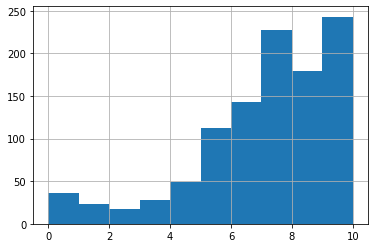

In [17]:
ratings_valid['rating'].hist()

### Ïò§ÌîÑÎùºÏù∏ ÌèâÍ∞ÄÎ•º ÏúÑÌïú RMSE Ìï®Ïàò ÎßåÎì§Í∏∞

In [18]:
expected = ratings_valid[1:10]
answer = ratings_valid[:10]
expected

userid  itemid  rating
3543  OTQzaFo=  108037       8
4826  M2p2QTk=   87427       7
4330  REhkazM=   95755       3
3635  MWNiOE0=   70107       7
1685  NzZtTHg=  111292       9
5242  MkpYaGk=  125049       5
2034  RjVKVw==   48632       3
1910  REI4WTI=   47519       6
1975  M0szalc=  108035       7

In [19]:
answer

userid  itemid  rating
1000  NEpQdHA=   53983       9
3543  OTQzaFo=  108037       8
4826  M2p2QTk=   87427       7
4330  REhkazM=   95755       3
3635  MWNiOE0=   70107       7
1685  NzZtTHg=  111292       9
5242  MkpYaGk=  125049       5
2034  RjVKVw==   48632       3
1910  REI4WTI=   47519       6
1975  M0szalc=  108035       7

#### ÎÇòÏùò ÏΩîÎìú

In [20]:
# def rmse(expected, answer):
#     sum_ratings = 0
#     df = pd.merge(answer, expected, how = 'left', on = 'userid').fillna(0)
#     for idx in range(0, 10):
#         sum_ratings += ((df['rating_x'][idx]-df['rating_y'][idx]) ** 2)
#     return (( sum_ratings/10 ) ** 0.5)

# rmse(expected, answer)
# rmse_val = rmse(expected, answer)
# print(rmse_val)

#### ÏπòÏôÑÎãò ÏΩîÎìú

In [21]:
def rmse(expected, answer):
    joined = pd.merge(answer, expected, on=['userid', 'itemid'], how = 'left')
    joined['rating_y'] = joined['rating_y'].fillna(0)
    joined['square_error'] = (joined['rating_x'] - joined['rating_y']) ** 2
    return np.sqrt(joined['square_error'].mean())
rmse(expected, answer)

2.8460498941515415

In [22]:
def predict(u, i):
    return 8.0

expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
expected.head()

userid  itemid  rating
1000  NEpQdHA=   53983     8.0
3543  OTQzaFo=  108037     8.0
4826  M2p2QTk=   87427     8.0
4330  REhkazM=   95755     8.0
3635  MWNiOE0=   70107     8.0

In [23]:
rmse(expected, ratings_valid)

2.7423239390279464

### Î™®Îì† ÏòàÏ∏°ÏùÑ Ï†ÑÏ≤¥ ÌèâÏ†êÏùò ÌèâÍ∑†ÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Ï∂îÏ≤ú Î°úÏßÅ (p. 24) - train Îç∞Ïù¥ÌÑ∞ Ïù¥Ïö©

In [24]:
# ÎÇòÏùò ÏΩîÎìú == ÏπòÏôÑÎãò ÏΩîÎìú

def predict(u, i):
    return ratings['rating'].mean()
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.418031954051125

In [25]:
# ÏπòÏôÑÎãò ÏΩîÎìú
r_mean = ratings['rating'].mean()
def predict(u, i):
    return r_mean
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.418031954051125

### Î™®Îì† ÏòàÏ∏°ÏùÑ Ï£ºÏñ¥ÏßÑ ÏÇ¨Ïö©ÏûêÏùò ÌèâÍ∑† ÌèâÏ†êÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Ï∂îÏ≤ú Î°úÏßÅ (p. 25)

In [26]:
# ÎÇòÏùò ÏΩîÎìú == ÏπòÏôÑÎãò ÏΩîÎìú

# groupbyÎ•º Ïù¥Ïö©Ìïú ÏΩîÎìú
# def predict(u, i):
#     return train.groupby('userid')['rating'].mean().loc[u]

def predict(u, i):
    return ratings[ratings['userid'] == u]['rating'].mean()
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.1909154513519242

### Î™®Îì† ÏòàÏ∏°ÏùÑ Ï£ºÏñ¥ÏßÑ ÏòÅÌôîÏùò ÌèâÍ∑† ÌèâÏ†êÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Ï∂îÏ≤ú Î°úÏßÅ (p. 25)

In [27]:
#ÎÇòÏùò ÏΩîÎìú
def predict(u, i):
    return ratings[ratings['itemid'] == i]['rating'].mean()
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.237838086446809

---

## User-User Collaborative Filtering

### 1. Ïú†ÏÇ¨ÎèÑ Ìï®Ïàò (Jaccard Similarity)

In [28]:
# set ÏÇ¨Ïö©Î≤ï 
a = set([1, 2, 3])
b = set([0, 1, 2, 3, 4, 5])
a | b

{0, 1, 2, 3, 4, 5}

In [29]:
set(ratings_with_movies[ratings['userid'] == 'TERhUA==']['title'])

{'Í≥†Ïûâ Îçî ÎîîÏä§ÌÑ¥Ïä§ (2010)',
 'Í∑∏ÎÖÄÎäî Í±∞ÏßìÎßêÏùÑ ÎÑàÎ¨¥ ÏÇ¨ÎûëÌï¥ (2013)',
 'ÎÇòÏùò PS ÌååÌä∏ÎÑà (2012)',
 'Îß§ÏßÅ ÏïÑÏõå (2008)',
 'Î≥¥Ìä∏ (2009)',
 'ÏàòÏÉÅÌïú Í∑∏ÎÖÄ (2013)',
 'Ïò•Ïûê (2017)',
 'ÌîåÎûÄÎã§Ïä§Ïùò Í∞ú (2000)'}

### ÏÑúÎ°ú Îã§Î•∏ ÏÇ¨Ïö©Ïûê u, vÏóê ÎåÄÌï¥ jaccard similarity Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò (p. 28)

In [30]:
# ÎÇòÏùò ÏΩîÎìú
def sim(u, v):
    set_u = set(ratings_with_movies[ratings['userid'] == u]['title'])
    set_v = set(ratings_with_movies[ratings['userid'] == v]['title'])
    return len(list(set_u & set_v)) / len(list(set_u | set_v))
sim('TERhUA==', 'Q1ladXM=')

0.08333333333333333

In [31]:
# ÏπòÏôÑÎãò ÏΩîÎìú
# ÌÖåÏù¥Î∏î Ï†ÑÏ≤¥Î•º ÌïúÎ≤àÏóê Î≥¥Í≥† userid Í∞íÏùÑ keyÎ°ú ÌïòÍ≥† itemidÎì§Ïùò set ÏßëÌï©ÏùÑ valueÎ°ú Í∞ÄÏßÄÎäî dictionaryÎ•º ÏÇ¨Ï†ÑÏóê Ï†ÄÏû•

all_users = ratings['userid'].unique()
i_dict = {u: set(ratings[ratings['userid'] == u]['itemid']) for u in all_users}
def sim(u, v):
#     i_u = set(ratings_with_movies[ratings['userid'] == u]['itemid'])
#     i_v = set(ratings_with_movies[ratings['userid'] == v]['itemid'])
    i_u = i_dict[u]
    i_v = i_dict[v]
    
    cup = i_u | i_v
    if len(cup) == 0:
        return 0.0
    cap = i_u & i_v
    return len(cap) / len(cup)

sim('TERhUA==', 'Q1ladXM=')

0.08333333333333333

### ÎπÑÏä∑Ìïú ÏòÅÌôîÎ•º ÏÜåÎπÑÌïú kÎ™ÖÏùò ÏÇ¨Ïö©Ïûê ÏßëÌï© U_uÎ•º Í≥ÑÏÇ∞ÌïòÎäî (p. 29)

In [32]:
# ÎÇòÏùò ÏΩîÎìú
# all_users = ratings['userid'].unique()
# i_dict = {u: set(ratings[ratings['userid'] == u]['itemid']) for u in all_users}
import operator
def similar_users(u, k):
    i_u = i_dict[u]
    sim_dic = {}
    for i_key, i_value in i_dict.items():
        if i_key == u:
            continue
        else:
            sim_dic[i_key] = sim(u, i_key)
            
    sorted_dic = sorted(sim_dic.items(), key=operator.itemgetter(1), reverse = True)[:k]
    # Í∑∏ÎÉ• sorted_dic ÌïòÎ©¥ Ïú†ÏÇ¨ÎèÑÍ∞Ä Ìï®ÍªòÎÇòÏò§ÎØÄÎ°ú ÏïÑÏù¥ÎîîÎßå Ï†ÄÏû•Ìïú DataFrame ÎßåÎì¶!
    return pd.DataFrame([sorted_id for sorted_id, v in sorted_dic]) 
similar_users('TERhUA==', 5)

0
0  YzkyQQ==
1  NGdmcVQ=
2  M2hETGQ=
3  V0NyaQ==
4  ODQ2R0c=

In [33]:
# ÏπòÏôÑÎãò ÏΩîÎìú
def similar_users(u, k):
    sims = sorted([(sim(u, v), v) for v in all_users if u!= v], reverse = True)
    topk_users = [v for s, v in sims][:k]
    return pd.DataFrame(topk_users, columns=['userid'])
similar_users('TERhUA==', 5)

userid
0  YzkyQQ==
1  NGdmcVQ=
2  M2hETGQ=
3  V0NyaQ==
4  QTB5d0E=

##### ÏôÑÎ≤ΩÌïú ÏΩîÎìúÎ•º ÏßúÍ∏∞ Ï†Ñ Í≥ºÏ†ï

In [34]:
u = 'TERhUA=='
k = 5
sims = [(sim(u, v), v) for v in all_users if u!=v]
sorted_sims = sorted(sims, reverse=True)
topk_users = [v for s, v in sorted_sims[:k]]
pd.DataFrame(topk_users, columns=['userid'])

userid
0  YzkyQQ==
1  NGdmcVQ=
2  M2hETGQ=
3  V0NyaQ==
4  QTB5d0E=

### ÏÜåÎπÑÏûê ùë¢ÏôÄ ÏòÅÌôî ùëñÏóê ÎåÄÌïú ÏòàÏ∏° ÌèâÏ†êÏùÑ Í≥ÑÏÇ∞ÌïòÎäî ùëùùëüùëíùëëùëñùëêùë°(ùë¢,ùëñ)Ìï®Ïàò

Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞~~~ ÏπòÏôÑÎãò ipynb ÌååÏùº ÌôïÏù∏

In [40]:
def predict(u, i):
    topk_users = similar_users(u, 5)
    topk_users['sim'] = topk_users.apply(lambda row: sim(u, row['userid']), axis=1)
    i_ratings = ratings[ratings['itemid'] == i]
    joined = pd.merge(topk_users, i_ratings, on='userid')
    joined['weighted_rating'] = joined['sim'] * joined['rating']
    
    # Ìï¥Îãπ ÏÜåÎπÑÏûê uÎ•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú Ïó¨Îü¨ ÏÇ¨Îûå ÎπÑÏ§ëÏùò Ìï©Ïù¥ 1Ïù¥ ÎêòÎèÑÎ°ù ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÎßàÏßÄÎßâÏóê simÍ∞íÏùò Ìï©ÏúºÎ°ú ÎÇòÎà†Ï§ÄÎã§.
    return joined['weighted_rating'].sum() / joined['sim'].sum()
predict('TERhUA==', 86909)

6.0

##### ÏôÑÎ≤ΩÌïú ÏΩîÎìúÎ•º ÏßúÍ∏∞ Ï†Ñ Í≥ºÏ†ï

In [36]:
u = 'TERhUA=='
i = 86909
topk_users = similar_users(u, 5)
topk_users['sim'] = topk_users.apply(lambda row: sim(u, row['userid']), axis=1)
topk_users

userid       sim
0  YzkyQQ==  0.142857
1  NGdmcVQ=  0.125000
2  M2hETGQ=  0.125000
3  V0NyaQ==  0.111111
4  QTB5d0E=  0.111111

In [42]:
i_ratings = ratings[ratings['itemid'] == i]
joined = pd.merge(topk_users, i_ratings, on='userid')
joined

userid       sim  itemid  rating
0  YzkyQQ==  0.142857   86909       6

In [43]:
joined['weighted_rating'] = joined['sim'] * joined['rating']

In [45]:
joined['weighted_rating'].sum() / joined['sim'].sum()

6.0